<a href="https://colab.research.google.com/github/Felipe-Oliveira11/Marketing-ML/blob/master/Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Marketing 
<hr>
<br>


##### Desafio

O desafio envolve analisar campanhas de marketing de uma institiução bancária. Nas campanhas é vendido ao cliente um produto adicional de débito automático. Queremos saber se um determinado cliente se inscreve ou não ao produto. Portanto, é um problema de classificação:

* 1. ou o cliente se inscreve
* 2. ou o cliente não se inscreve

<br>

<p align=center>
<img src="https://cendyn.com/wp-content/uploads/2019/04/AdobeStock_240428469.jpg" width="70%"></p>






<br>

#### O Objetivo
É importante ressaltar que não se trata de uma competição de problemas de machine learning: não queremos o melhor escore do modelo e sim a sua melhor análise. Portanto, o objetivo deste desafio não é escovar os 3% de otimização na performance. E sim, a análise mais clara e objetiva que vai, consequentemente, permitir aos stakeholders entender melhor os dados e quais são os possíveis planos de ação e suas respectivas argumentações.



<br>

Portanto, em termos claros, os objetivos —e entregáveis— deste desafio podem ser divididos em duas categorias:

<b>Code:</b>

Implementar um modelo de classificação com uma performance aceitável

O aceitável é explicitamente arbitrário. Aceitável de modo que viabilize uma análise estatisticamente fundamentada
Conjunto de dados contendo a coluna da previsão, y'

<br>


<b>Insight:</b>

Elencar e analisar quais features são determinantes para aderência de um cliente ao produto
Descrever um plano de ação para futuras campanhas de marketing fundamentado na análise deste conjunto de dados

<b>Os critérios</b>
<br>

O que será avaliado pode ser dividido em duas categorias de capacidades

<b>Analíticas: de exploração de dados</b>

* 1. na exploração uni e multivariada dos dados
* 2. para correção e transformação de dados (quando for necessário)
* 3. para encontrar e responder às perguntas certas
* 4. para decidir quais visualizações devem ser feitas (e quais devem permanecer na análise)
* 5. para entender o comportamento estatístico das variáveis e seu peso na orientação das análises.



<b>Problemas: de aprendizado de máquina </b>

* 1. na definição de quais métricas vão ser usadas para avaliar a performance.
* 2. na apresentação e análise dos resultados obtidos
* 3. na avaliação do over-underfitting do(s) modelo(s) (e o que pode ser feito para minimizar estes efeitos)
* 4. no manuseio das features: avaliação de importância, da seleção e criação/transformação

In [1]:
!pip install yellowbrick
!pip install shap
!pip install pycaret 

### 1. Frameworks

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

import shap
shap.initjs()

from yellowbrick.classifier import ConfusionMatrix
from hyperopt import hp, tpe, fmin, Trials
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path = '/content/drive/My Drive/Inteligência Artificial - Colab/Marketing /campaigns.csv'
marketing = pd.read_csv(path)
marketing.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40690 entries, 0 to 40689
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  40690 non-null  int64 
 1   age         40690 non-null  int64 
 2   job         40690 non-null  object
 3   marital     40690 non-null  object
 4   education   40690 non-null  object
 5   default     40690 non-null  object
 6   balance     40690 non-null  int64 
 7   housing     40690 non-null  object
 8   loan        40690 non-null  object
 9   contact     40690 non-null  object
 10  day         40690 non-null  int64 
 11  month       40690 non-null  object
 12  duration    40690 non-null  int64 
 13  campaign    40690 non-null  int64 
 14  pdays       40690 non-null  int64 
 15  previous    40690 non-null  int64 
 16  poutcome    40690 non-null  object
 17  y           40690 non-null  object
dtypes: int64(8), object(10)
memory usage: 5.6+ MB


### Dicionário de dados 

*  <b>Unnamed: 0</b>  ID do cliente 
* <b>age</b>: Idade do cliente 
* <b>job</b>: Profissão do cliente 
* <b>marital</b>: Relacionamento conjugal
* <b>education</b>: Grau acadêmico 
* <b>default </b>: tem crédito em padrão? (binário: "sim", "não")
* <b> balance </b>: saldo médio anual, em euros (numérico)
* <b> housing </b>: tem empréstimo à habitação? (binário: "sim", "não")
* <b> loan  </b>: tem empréstimo pessoal? (binário: "sim", "não")
* <b> contact </b>: Contato do cliente 
* <b> day </b>: último dia de contato do mês (numérico)
* <b> month </b>: mês do último contato do ano (categórico: "jan", "feb", "mar", ..., "nov", "dec")
* <b> duration </b>: duração do último contato, em segundos (numérico)
* <b> campaign </b>: número de contatos realizados durante esta campanha e para este cliente (numérico, inclui o último contato)
* <b> pdays </b>: número de dias que passaram após o último contato do cliente de uma campanha anterior (numérico, .1 significa que o cliente não foi contatado anteriormente)
* <b> previous </b>: número de contatos realizados antes desta campanha e para este cliente (numérico)  
* <b> poutcome </b>: resultado da campanha de marketing anterior (categórica: "desconhecido", "outro", "falha", "sucesso")
* <b> y </b>: o cliente assinou um depósito a prazo? (binário: "sim", "não")



<br>
<hr>

<br>

### 2. Análise Exploratória de dados 

O contexto do nosso problema é identificar, a adesão de um cliente a uma campamnha de marketing ou não, vou fazer uma análise sobre as features contidas neste dataset, para descrever melhor o comportamento das features e a relação do cliente e o seu comportamento, diante de uma campanha de marketing. 

<br>
<hr>


##### Houve um número maior de clientes que se inscreveram ? 

Inscritos: 4787  | Não inscritos: 35903






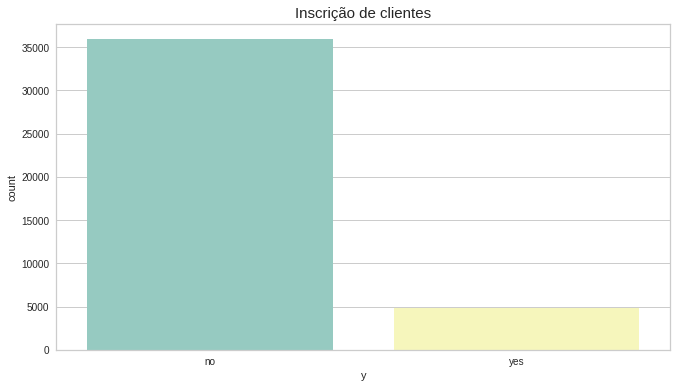

In [5]:
# Clientes inscritos
inscritos = len(marketing[marketing['y']=='yes'])
nao_inscritos = len(marketing[marketing['y']=='no'])


print('Inscritos: {}  | Não inscritos: {}'.format(inscritos, nao_inscritos))
print('\n')

plt.figure(figsize=(11,6))
plt.title('Inscrição de clientes', fontsize=15)
sns.countplot(marketing['y'], palette='Set3')
print('\n')

A base contém <b> 40.690 </b> clientes, apenas <b> 4.787 </b> se inscreveram na campanha de marketing proposta, há uma diferença bruta nos números, e identificamos que vamos ter que ponderar um desbalancemaneto bruto de classes na parte posterior da modelagem. 

<br>
<hr>
<br>





##### Qual a idade média dos clientes inscritos e não inscritos ? 

Idade média inscritos: 42
Idade média não inscritos: 41




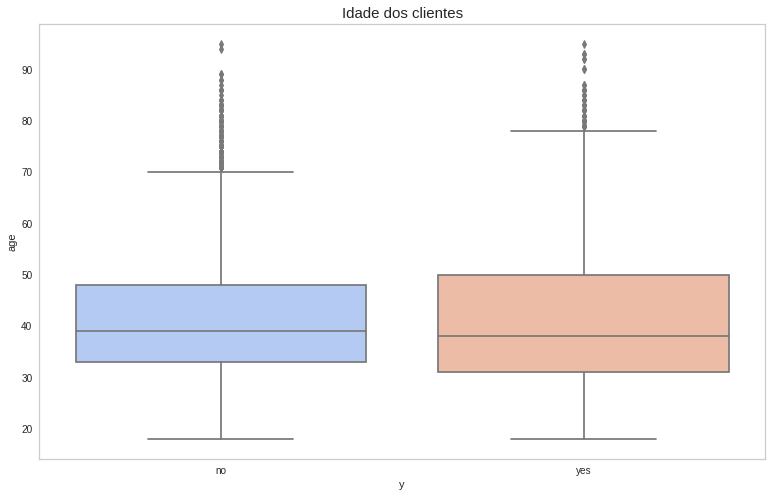

In [6]:
plt.figure(figsize=(13,8))
plt.grid(False)
plt.title('Idade dos clientes', fontsize=15)
sns.boxplot(x='y', y='age', data=marketing, palette='coolwarm')

# Idade média 
media_inscritos = round(np.mean(marketing[marketing['y']=='yes']['age']))
media_nao_inscritos = round(np.mean(marketing[marketing['y']=='no']['age']))

print('Idade média inscritos: {}'.format(media_inscritos))
print('Idade média não inscritos: {}'.format(media_nao_inscritos))
print('\n')

Olhando para o gráfico de boxplot, onde comparamos a idade do cliente com sua decisão de inscrição ou não, cliente acima dos 70 anos possuem uma grande adesão ao produto adicional, clientes entre 20 a 30 anos  são destaques que tem uma maior adesão também pelo produto, vamos continuar investigando essas hipóteses.  

In [7]:
# Inscritos acima dos 70 anos 
len(marketing[(marketing['y']=='yes') & (marketing['age']>=70)])

214

In [8]:
# Não Inscritos acima dos 70 anos 
len(marketing[(marketing['y']=='no') & (marketing['age']>=70)])

282

<br>
<hr>


##### A Profissão tem impacto nas inscrições ? 

In [9]:
print('Profissões dos clientes')
print('\n')
marketing['job'].value_counts()

Profissões dos clientes




blue-collar      8769
management       8504
technician       6818
admin.           4661
services         3725
retired          2027
self-employed    1427
entrepreneur     1339
unemployed       1193
housemaid        1125
student           848
unknown           254
Name: job, dtype: int64


Entendimento de algumas profissões

* <b> blue-collar: </b> Um trabalhador de colarinho azul é um membro da classe trabalhadora que normalmente realiza trabalho manual.

* <b> retired: </b> Aposentados
* <b> self-employed: </b> Trabalhados Autonomos
* <b> unemployed: </b> Desimpregados 
* <b> housemaid: </b> Empregados caseiros 





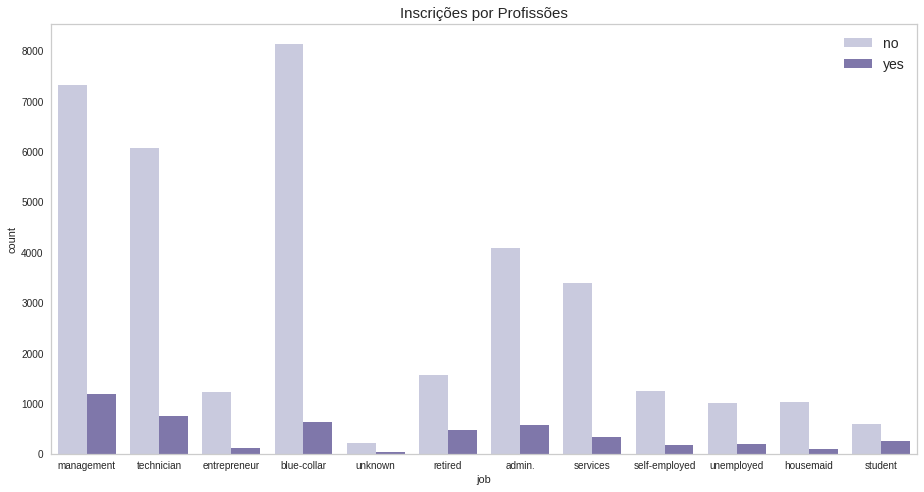

In [10]:
plt.figure(figsize=(13,7))
plt.title('Inscrições por Profissões', fontsize=15)
sns.countplot(marketing['job'], hue='y', data=marketing, palette='Purples')
plt.grid(False)
plt.legend(fontsize=14)
plt.tight_layout()

A profissão dos clientes, não se mostrou uma feature pertinente para a tomada de decisão dos clientes, em adquirir o produto adicional.  

In [11]:
management = len((marketing[(marketing['y']=='yes') & (marketing['job']=='management')]))
technician = len((marketing[(marketing['y']=='yes') & (marketing['job']=='technician')]))
entrepreneur = len((marketing[(marketing['y']=='yes') & (marketing['job']=='entrepreneur')]))
blue_collar = len((marketing[(marketing['y']=='yes') & (marketing['job']=='blue-collar')]))
unknown = len((marketing[(marketing['y']=='yes') & (marketing['job']=='unknown')]))
retired = len((marketing[(marketing['y']=='yes') & (marketing['job']=='retired')]))
admin = len((marketing[(marketing['y']=='yes') & (marketing['job']=='admin')]))
services = len((marketing[(marketing['y']=='yes') & (marketing['job']=='services')]))
self_employed = len((marketing[(marketing['y']=='yes') & (marketing['job']=='self-employed')]))
unemployed = len((marketing[(marketing['y']=='yes') & (marketing['job']=='unemployed')]))
maid = len((marketing[(marketing['y']=='yes') & (marketing['job']=='housemaid')]))
student = len((marketing[(marketing['y']=='yes') & (marketing['job']=='student')]))


print('Inscritos')
print('\n')
print('Gerentes: {}'.format(management))
print('Técnicos: {}'.format(technician))
print('Trabalhadores manual: {}'.format(blue_collar))
print('Aposentados: {}'.format(retired))
print('Serviços: {}'.format(services))
print('Estudantes: {}'.format(student))
print('Desimpregados: {}'.format(unemployed))
print('Autonomos: {}'.format(self_employed))
print('Empreendedores: {}'.format(entrepreneur))
print('Caseiros: {}'.format(maid))
print('desconhecidos: {}'.format(unknown))
print('Administradores: {}'.format(admin))

Inscritos


Gerentes: 1178
Técnicos: 753
Trabalhadores manual: 637
Aposentados: 467
Serviços: 331
Estudantes: 247
Desimpregados: 185
Autonomos: 172
Empreendedores: 113
Caseiros: 95
desconhecidos: 31
Administradores: 0


<br>
<hr>
<br>


##### Qual o grau acadêmico com maior número de adesão ao produto ? 

<br>

No handles with labels found to put in legend.


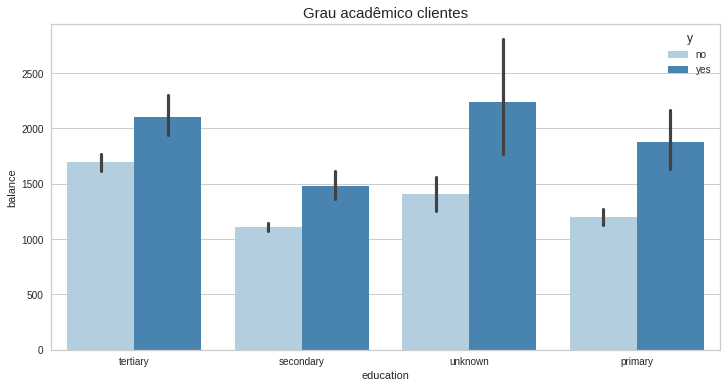

In [12]:
plt.figure(figsize=(12,6))
plt.title('Grau acadêmico clientes', fontsize=15)
plt.legend(fontsize=14)
sns.barplot(x='education', y='balance', data=marketing, palette='Blues', hue='y')
print('\n')

A adesão pelo produto comparada com o grau acadêmico, mostrou que  <b>tertiary </b> juntamente com <b> unknown </b> são os graus acadêmicos dos clientes que mais aderiram ao produto, clientes com um saldo media anual maior acabam adotando a campanha, a tendência é de que maior o saldo do cliente, maior as chances de adiquirir o produto. 

<br>
<hr>
<br>

##### A duração e a forma de contato, interfere na adesão do cliente ?


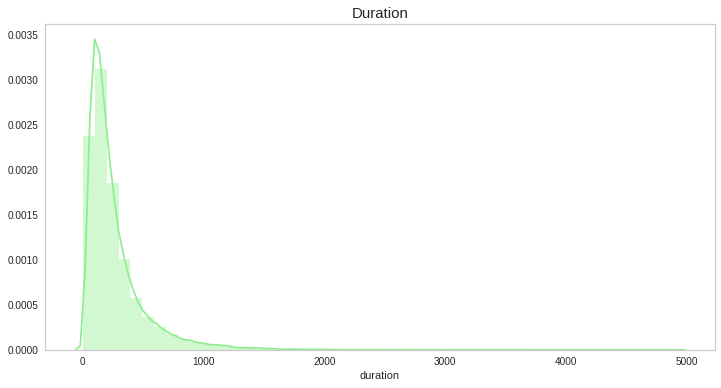

In [13]:
# distribuição (duration)

plt.figure(figsize=(12,6))
plt.title('Duration', fontsize=15)
plt.grid(False)
sns.distplot(marketing['duration'], color='lightgreen', kde=True)
print('\n')

A duração possui uma Assimetria positiva, com uma cauda mais fina e longa a direita da distribuição, a maior parte dos valores estão entre 0 a 1000 segundos. 



Duração média (Adesão): 538


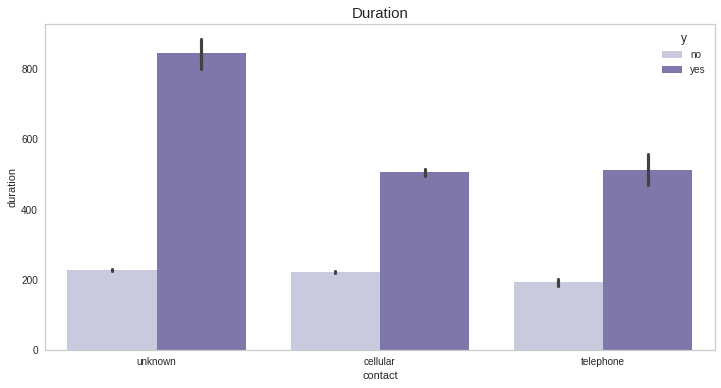

In [14]:
# Retenção de Clientes por Contato 

plt.figure(figsize=(12,6))
plt.title('Duration', fontsize=15)
plt.grid(False)
sns.barplot(x='contact', y='duration', hue='y', data=marketing, palette='Purples')
print('\n')


duration_mean = np.mean(marketing[marketing['y']=='yes']['duration'])
print('Duração média (Adesão): {}'.format(round(duration_mean)))

Quanto maior a duração do contato com o cliente, maior são as probabilidades de sucesso e adesão da campanha por parte dos clientes, o tipo do contato é independente mas a sua duração mostra uma alta taxa de conversão para adquirir o produto adicional. 


A duração média para clientes, que adquirem a campanha é de <b> 538 </b> (medida não informada)

In [15]:
def month_analysis(marketing, name_1, name_2):

  """ análise de duração de contato
  com clientes durante o mês """

  # Verificação 
  if name_2 == None: 
    month = marketing.copy()
    month = (marketing[(marketing['y']=='yes') & (marketing['month']==name_1)])
    media_1 = (marketing[(marketing['y']=='yes') & (marketing['month']==name_1)])['duration'].mean()
    print('Mês: {} | Sim: {} | Duração média: {}'.format(name_1 ,len(month), round(media_1)))

    plt.figure(figsize=(17,7))
    plt.grid(False)
    sns.lineplot(x='duration', y='balance', hue='month', data=month)

  else:
    pass 
       
  # dados 
  month = marketing.copy()
  month = (marketing[(marketing['y']=='yes') & (marketing['month']==name_1)])
  month_2 = (marketing[(marketing['y']=='yes') & (marketing['month']==name_2)])

  # média 
  media_1 = (marketing[(marketing['y']=='yes') & (marketing['month']==name_1)])['duration'].mean()
  media_2 = (marketing[(marketing['y']=='yes') & (marketing['month']==name_2)])['duration'].mean()

  # resumo 
  print('Mês: {} | Sim: {} | Duração média: {}'.format(name_1 ,len(month), round(media_1)))
  print('Mês: {} | Sim: {} | Duração média {}'.format(name_2 ,len(month_2), round(media_2)))


  # primeiro mês 
  plt.figure(figsize=(17,7))
  plt.subplot(2,1,1)
  plt.grid(False)
  sns.lineplot(x='duration', y='balance', hue='month', data=month)
  
  print('\n')
  
  # segundo mês 
  plt.subplot(2,1,2)
  plt.grid(False)
  sns.lineplot(x='duration', y='balance', hue='month', data=month_2)
  plt.tight_layout()

Mês: jan | Sim: 127 | Duração média: 523
Mês: feb | Sim: 397 | Duração média 436




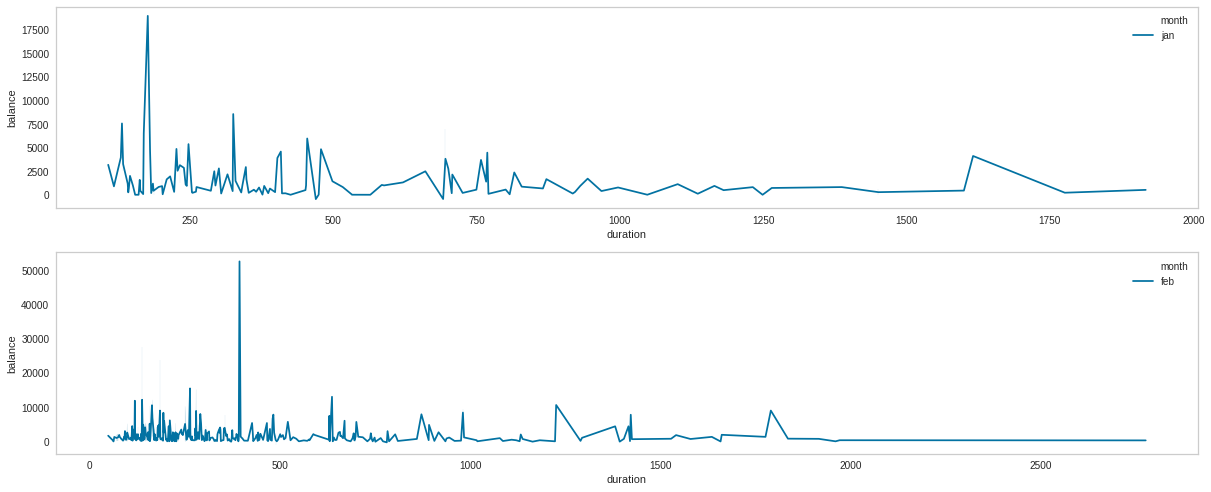

In [16]:
# Janeiro e Fevereiro
month_analysis(marketing, 'jan', 'feb')

Mês: mar | Sim: 227 | Duração média: 305
Mês: apr | Sim: 522 | Duração média 461




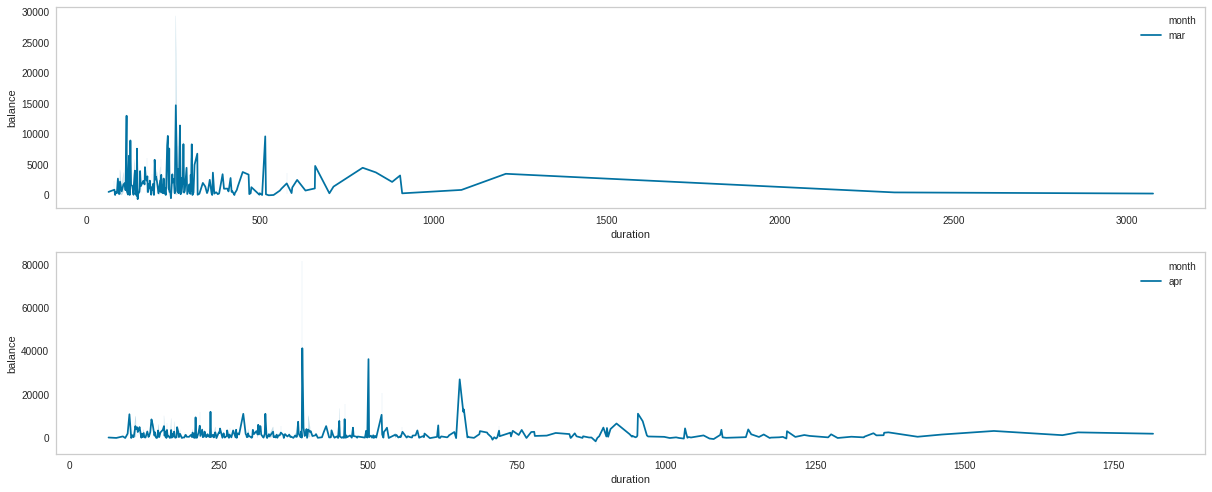

In [17]:
# Março e Abril 
month_analysis(marketing, 'mar', 'apr')

Mês: jun | Sim: 490 | Duração média: 565
Mês: jul | Sim: 573 | Duração média 690




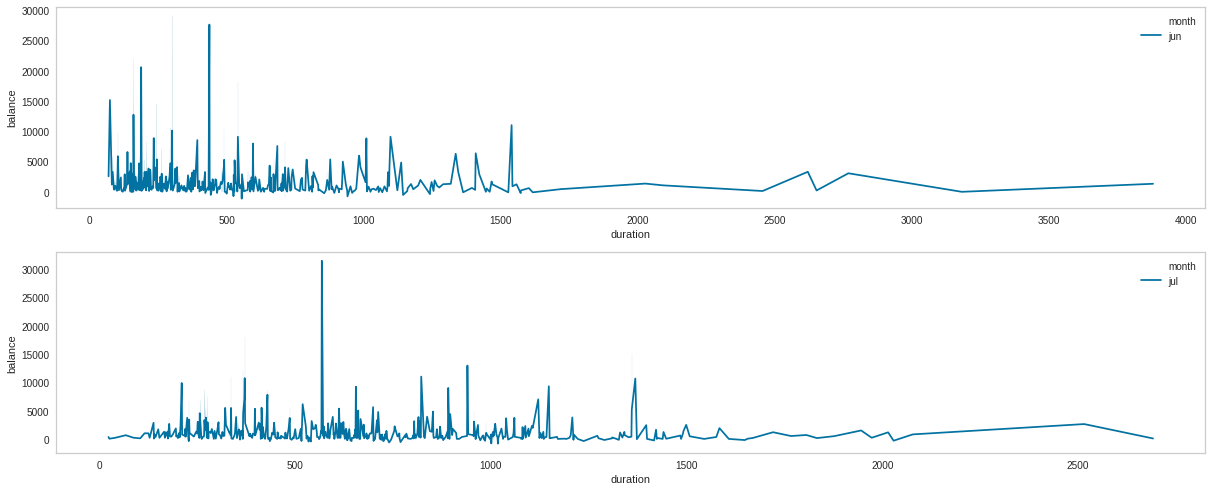

In [18]:
# Junho e Julho 
month_analysis(marketing, 'jun', 'jul')

Mês: aug | Sim: 629 | Duração média: 538
Mês: sep | Sim: 240 | Duração média 374




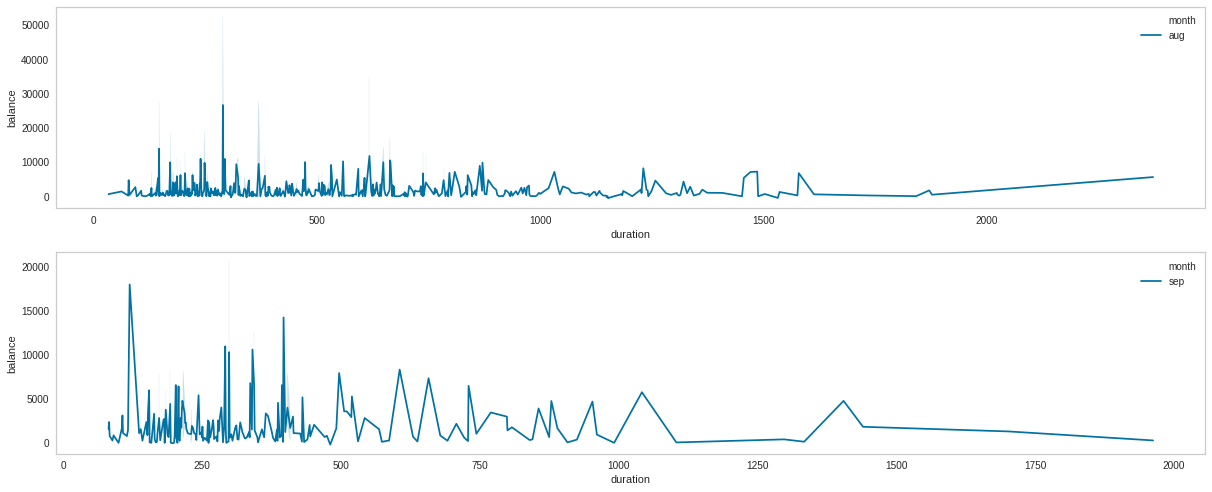

In [19]:
# Agosto e Setembro
month_analysis(marketing, 'aug', 'sep')

Mês: oct | Sim: 285 | Duração média: 365
Mês: nov | Sim: 367 | Duração média 563




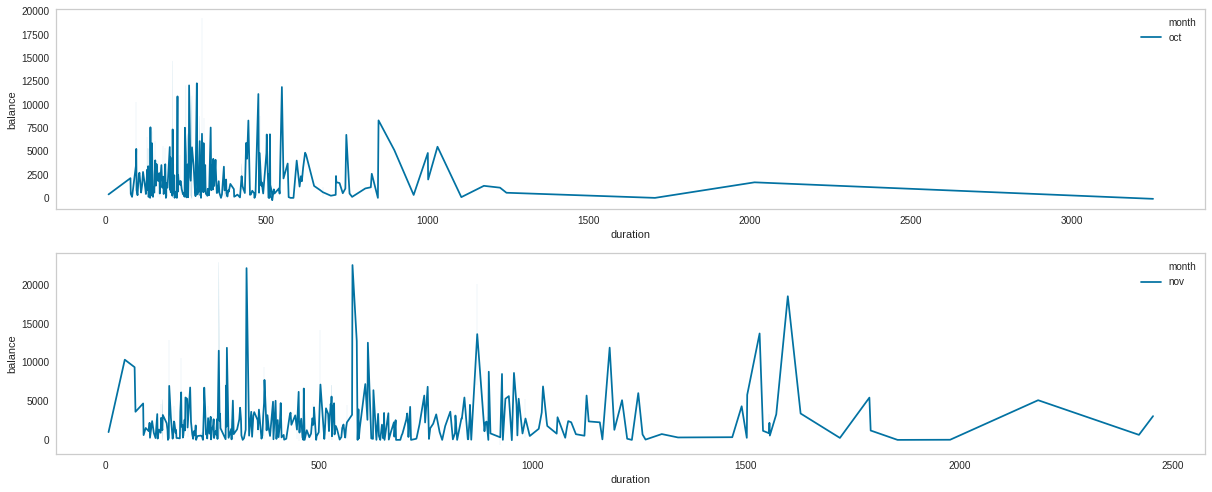

In [20]:
# Outubro e Novembro  
month_analysis(marketing, 'oct', 'nov')

<br>

Com esse análise obtivemos alguns insights poderosos, o primeiro a resaltar é que o primeiro semestre de campanha cerca de <b> 1.409 </b> Clientes assinaram o depósito de prazo do produto oferecido pelo marketing, os meses de <b> Fevereiro, Abril, e Junho </b> foram os meses de maior adesão, no segundo semestre do ano há uma queda no meses de <b> Setembro, Outubro e Dezembro </b> foram os meses com menor taxa de adesão dos clientes.


Clientes com um saldo médio maior, tendem a assinar um depósito a prazo com uma duração bem menor, que clientes com um saldo médio menor, varia muito o tempo de duração de um contato com o cliente, há meses em que a média é <b> 436 </b> há meses do segundo semestre do ano com <b> médias entre 536 há 600 </b> a melhor forma é segmentar os clientes, em uma escala através do seu saldo médio anual. 

<br>
<hr>

##### Qual estado civil de clientes há mais adesões ? 


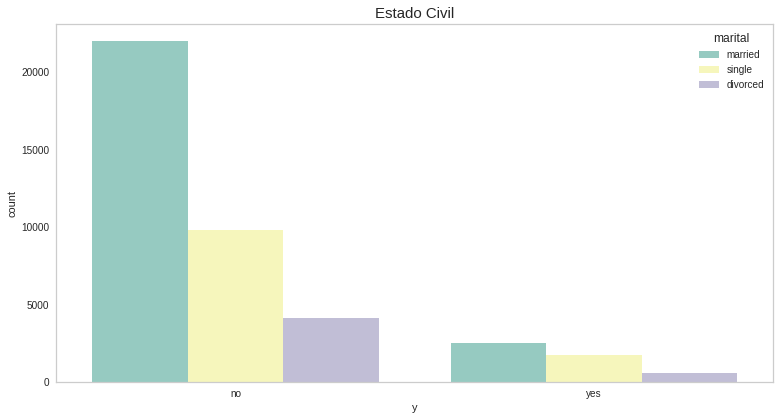

In [21]:
plt.figure(figsize=(11,6))
plt.title('Estado Civil', fontsize=15)
sns.countplot(x='y', hue='marital', data=marketing, palette='Set3')
plt.grid(False)
plt.tight_layout()

A base de clientes possui um número expresivo de clientes <b> Casados </b> seguido de <b> Solteiros e Divorciados </b> 
<br>

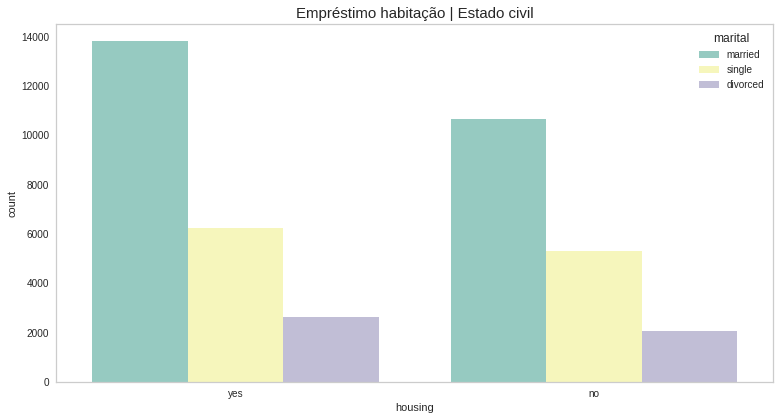

In [22]:
plt.figure(figsize=(11,6))
plt.title('Empréstimo habitação | Estado civil', fontsize=15)
sns.countplot(x='housing', hue='marital', data=marketing, palette='Set3')
plt.grid(False)
plt.tight_layout()

Clientes casados e que possuem empréstiomo na habitação, são a maioria na bases, seguido de Solteiros e Divorciados, a ordem se mantém igualmente a análise anterior.

<br>
<hr>


### Conclusões da Análise

A base tem um desequilibrio muito grande, entre clientes que fizeram a adesão do produto adicional, e clientes que recusaram o serviço, isso deve ser tratato posteriormente na etapa de modelagem. 



* A campanha abordou majoritariamente pessoas entre 30 e 50 anos, entretanto, este é o grupo com menor aderência ao produto. Adicionalmente, percebe-se que quanto a idade, os grupos com maior aceitação ao produto são jovens entre 18 e 30 anos e idosos acima de 60 anos.


* Seguindo a tendência da idade, as ocupações com maior taxa de retenção são estudantes e aposentados. Entretanto, percebe-se que a empresa investiu maior parte dos seus esforços em pessoas que trabalham com gerência, técnicos e blue-collar

* O meses do primeiro semestre dentre eles Fevereiro, Abril e Junho foram os meses, com a maior retenção de clientes, em contra partida os meses de Outubro, Dezembro, Janeiro tiveram números bem abaixos.


* Clientes que possuem um saldo média anual baixo, apresentam baixas taxas de adsão ao produto adicional muito pela, duração do contato com o cliente. 

* A duração é uma característica muito importante, já que a retenção aumenta à medida que a duração aumenta. Além disso, percebe-se que a maioria das ligações duram entre 1.5 e 4 minutos aproximadamente, logo esse parece ser o ponto chave na conversa que desperta ou não o interesse do cliente
Em relação à quantidade de contatos com o cliente durante a campanha, percebe-se que a retenção diminuição à medida que aumenta o número de contatos. Portanto, é benéfico manter o número de contatos baixo.


* Os clientes que já foram abordados antes da campanha apresentam uma receptividade melhor ao produto

<br>
<br>

### Proposta de Plano de Ação 


* <b> Público: </b> A empresa deve direcionar seus recursos para abordar sobretudo estudantes e pessoas aposentadas, em meses específicos com maior adesão, mostrados nas análises. 


* <b> Job: </b> A profissão do cliente pode também ser criada uma personalização de produtos, um mesmo produto pode não pode ter o mesmo uso/utilidade para um estudante comparado a um Gerente, há essa diferença em interesses e necessidades dos clientes. 



* <b> Idade: </b> Nas próximas campanhas, a empresa deve focar seus esforços nos clientes com menos que 30 anos e mais que 60 anos.


* <b> Mês: </b> A adesão dos clientes parece possuiu um comportamento sazonal, que varia de mês a mês, a sugestão é criar investir em campanhas nos meses que obtiveram maior adesão ao produto, no primeiro semestre Fevereiro, Abril e junho, partindo para o segundo semestre os meses de Julho, Agosto e Novembro. 

* <b> Marital: </b> Empresa pode propor campanhas e serviços exclusivos para cada cliente, segmentando através do seu estado civil, produtos específicos para clientes Casados, Solteiros e Divorciados. 


<br>
<hr>
<br>



### 3. Feature Engineering

Etapa de corrigir dados incorretos, com ruídos e valores faltantes, conforme o entendimento dos dados e suas características específicas, vamos através dessas hipóteses modelar nosso problema para um solução que seja plausível e satisfatória. 

<br>
<hr>
